<a href="https://colab.research.google.com/github/darrencheninfo/ADS504_G1_Project/blob/main/ADS504_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

This is the exploration of the Dept of Transportation Flight analytics data from 2009-2019 - looking at the various factors that may contribute to airline delays and predict how long these airlines will likely delay. 

## Setup

### Get Libraries

In [20]:
# %pip install --upgrade numpy scipy
# %pip install --upgrade cupy
# %pip install missingno

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

### Import Dataset

In [13]:
#import dataset
# df = pd.read_sas('/content/drive/MyDrive/ADS 504 | Final Project/LLCP2023.XPT ', format='xport') # replace with your dataset path
df = pd.read_csv("Data RAW/2009.csv")

In [14]:
df.shape

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429338 entries, 0 to 6429337
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,...,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,...,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,...,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,...,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,...,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_2010 = pd.read_csv("Data RAW/2010.csv")

df_2010.shape

(6450117, 28)

In [16]:
print(df_2010.columns)

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')


In [ ]:
# 1) Basic shape, columns, dtypes

print(f"Rows: {len(df):,} | Cols: {df.shape[1]}")
print("\nColumn dtypes:")
print(df.dtypes)

# Drop obvious artifacts (e.g., unnamed columns)
artifact_cols = [c for c in df.columns if c.lower().startswith("unnamed")]
if artifact_cols:
    df = df.drop(columns=artifact_cols)
    print(f"\nDropped artifact columns: {artifact_cols}")


# 2) Standardize column names (optional tidy)

df.columns = (
    df.columns
      .str.strip()
      .str.replace(r"\s+", "_", regex=True)
      .str.replace("[^0-9a-zA-Z_]", "", regex=True)
      .str.upper()
)


# 3) Known schema helpers & safe numeric conversions

# Columns present in your sample (adjust if your file differs)
time_like_cols = [
    "CRS_DEP_TIME", "DEP_TIME", "WHEELS_OFF", "WHEELS_ON",
    "CRS_ARR_TIME", "ARR_TIME"
]
delay_cols = [
    "DEP_DELAY", "ARR_DELAY", "CARRIER_DELAY", "WEATHER_DELAY",
    "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"
]
duration_cols = ["TAXI_OUT", "TAXI_IN", "CRS_ELAPSED_TIME", "ACTUAL_ELAPSED_TIME", "AIR_TIME"]
binary_indicator_cols = ["CANCELLED", "DIVERTED"]
id_like_cols = ["OP_CARRIER_FL_NUM", "DISTANCE"]


Rows: 6,429,338 | Cols: 28

Column dtypes:
FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtype: object

Dropped artifact columns: ['Unnamed: 27']


In [18]:

# Coerce numerics safely (keeps NaN for non-convertible)
to_numeric_cols = list(set(time_like_cols + delay_cols + duration_cols + binary_indicator_cols + id_like_cols) & set(df.columns))
for c in to_numeric_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")




In [21]:
# 4) Parse dates & clock HHMM ints

def hhmm_to_minutes(x):
    """Convert HHMM (e.g., 705, 1305) to minutes since midnight."""
    if pd.isna(x):
        return np.nan
    x = int(x)
    hh, mm = divmod(x, 100)
    if (hh < 0) or (hh > 23) or (mm < 0) or (mm > 59):
        return np.nan
    return hh * 60 + mm

def combine_date_time(date_series, hhmm_series):
    """Combine FL_DATE (YYYY-MM-DD) with HHMM into pandas datetime (naive, local)."""
    mins = hhmm_series.apply(hhmm_to_minutes)
    # midnight anchor; add minutes
    dt = pd.to_datetime(date_series, errors="coerce") + pd.to_timedelta(mins, unit="m")
    return dt

# Parse FL_DATE
if "FL_DATE" in df.columns:
    df["FL_DATE"] = pd.to_datetime(df["FL_DATE"], errors="coerce")

# Create datetime stamps (naive local time)
if set(["FL_DATE", "CRS_DEP_TIME"]).issubset(df.columns):
    df["CRS_DEP_DT"] = combine_date_time(df["FL_DATE"], df["CRS_DEP_TIME"])
if set(["FL_DATE", "DEP_TIME"]).issubset(df.columns):
    df["DEP_DT"] = combine_date_time(df["FL_DATE"], df["DEP_TIME"])
if set(["FL_DATE", "CRS_ARR_TIME"]).issubset(df.columns):
    # NOTE: arrival may be next day; adjust if actual < scheduled or elapsed > 24h as needed
    df["CRS_ARR_DT"] = combine_date_time(df["FL_DATE"], df["CRS_ARR_TIME"])
if set(["FL_DATE", "ARR_TIME"]).issubset(df.columns):
    df["ARR_DT"] = combine_date_time(df["FL_DATE"], df["ARR_TIME"])

# Simple next-day correction for arrivals crossing midnight (optional)
if {"CRS_DEP_DT", "CRS_ARR_DT"}.issubset(df.columns):
    mask_next = (df["CRS_ARR_DT"] < df["CRS_DEP_DT"])
    df.loc[mask_next, "CRS_ARR_DT"] = df.loc[mask_next, "CRS_ARR_DT"] + pd.Timedelta(days=1)
if {"DEP_DT", "ARR_DT"}.issubset(df.columns):
    mask_next = (df["ARR_DT"] < df["DEP_DT"])
    df.loc[mask_next, "ARR_DT"] = df.loc[mask_next, "ARR_DT"] + pd.Timedelta(days=1)



In [22]:

# 5) Cancellation codes & binary targets

# Normalize CANCELLED/DIVERTED to 0/1 ints
for c in ["CANCELLED", "DIVERTED"]:
    if c in df.columns:
        df[c] = (df[c].fillna(0) > 0).astype("int8")

# Map cancellation reason codes
if "CANCELLATION_CODE" in df.columns:
    code_map = {"A": "Carrier", "B": "Weather", "C": "NAS", "D": "Security"}
    df["CANCELLATION_REASON"] = df["CANCELLATION_CODE"].map(code_map)

# A practical business target: arrival delay ≥ 15 minutes
if "ARR_DELAY" in df.columns:
    df["IS_DELAYED_15"] = (df["ARR_DELAY"].fillna(0) >= 15).astype("int8")



In [23]:

# 6) Quick missingness & sanity EDA

def missingness_table(frame: pd.DataFrame, min_pct=0.0):
    miss = frame.isna().mean().sort_values(ascending=False).to_frame("missing_pct")
    miss["n_missing"] = (frame.shape[0] * miss["missing_pct"]).round().astype(int)
    out = miss[miss["missing_pct"] >= min_pct]
    return (out * 100).round(2).rename(columns={"missing_pct": "missing_%"}).sort_values("missing_%", ascending=False)

print("\nMissingness (%):")
display(missingness_table(df, min_pct=0.0).head(20))

# Numeric summary
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric describe (selected):")
display(df[num_cols].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T.round(2).head(25))

# Categorical peek
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
for c in cat_cols:
    print(f"\nTop values for {c}:")
    display(df[c].value_counts(dropna=False).head(10))




Missingness (%):


,missing_%,n_missing
CANCELLATION_CODE,98.65,634230000
CANCELLATION_REASON,98.65,634230000
CARRIER_DELAY,81.79,525883700
WEATHER_DELAY,81.79,525883700
NAS_DELAY,81.79,525883700
SECURITY_DELAY,81.79,525883700
LATE_AIRCRAFT_DELAY,81.79,525883700
ACTUAL_ELAPSED_TIME,1.59,10236200
AIR_TIME,1.59,10236100
ARR_DELAY,1.59,10236100



Numeric describe (selected):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
OP_CARRIER_FL_NUM,6429338.0,2293.71,2046.50,1.0,20.0,114.0,618.0,1629.0,3536.0,6523.0,7243.0,7829.0
CRS_DEP_TIME,6429338.0,1319.45,457.75,1.0,554.0,625.0,926.0,1315.0,1710.0,2045.0,2225.0,2359.0
DEP_TIME,6346471.0,1326.03,468.89,1.0,545.0,624.0,928.0,1322.0,1719.0,2101.0,2235.0,2400.0
DEP_DELAY,6346471.0,7.60,31.76,-96.0,-12.0,-9.0,-5.0,-2.0,5.0,59.0,147.0,2445.0
TAXI_OUT,6343551.0,16.04,10.56,1.0,5.0,7.0,10.0,13.0,19.0,34.0,57.0,458.0
WHEELS_OFF,6343551.0,1350.80,470.05,1.0,554.0,637.0,944.0,1336.0,1734.0,2116.0,2249.0,2400.0
WHEELS_ON,6340016.0,1478.51,487.85,1.0,120.0,734.0,1107.0,1510.0,1857.0,2228.0,2335.0,2400.0
TAXI_IN,6340017.0,6.89,4.91,0.0,2.0,3.0,4.0,6.0,8.0,15.0,26.0,197.0
CRS_ARR_TIME,6429338.0,1496.72,473.32,1.0,543.0,752.0,1119.0,1519.0,1903.0,2230.0,2339.0,2400.0
ARR_TIME,6340016.0,1485.66,490.41,1.0,57.0,738.0,1112.0,1515.0,1903.0,2232.0,2337.0,2400.0



Top values for OP_CARRIER:


OP_CARRIER
WN    1128947
AA     550056
OO     546195
MQ     435670
DL     426036
US     412008
UA     376272
XE     309360
EV     298696
NW     292400
Name: count, dtype: int64


Top values for ORIGIN:


ORIGIN
ATL    417449
ORD    313848
DFW    264396
DEN    235675
LAX    192879
PHX    183502
IAH    182097
LAS    153993
DTW    152081
SFO    136488
Name: count, dtype: int64


Top values for DEST:


DEST
ATL    417457
ORD    313769
DFW    264398
DEN    235700
LAX    192916
PHX    183491
IAH    182088
LAS    153984
DTW    152075
SFO    136532
Name: count, dtype: int64


Top values for CANCELLATION_CODE:


CANCELLATION_CODE
NaN    6342300
B        36651
A        35568
C        14799
D           20
Name: count, dtype: int64


Top values for CANCELLATION_REASON:


CANCELLATION_REASON
NaN         6342300
Weather       36651
Carrier       35568
NAS           14799
Security         20
Name: count, dtype: int64

In [24]:
# 7) Relationship checks (sanity, not strict asserts)

# Delays can be negative (early). This is just informative.
if {"DEP_DELAY", "ARR_DELAY"}.issubset(df.columns):
    print("\nDelay sanity snapshot:")
    print(df[["DEP_DELAY", "ARR_DELAY"]].describe().round(2))

# Optional: do delay causes roughly sum to ARR_DELAY (when delayed)?
# if {"ARR_DELAY", "CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"}.issubset(df.columns):
#     causes = ["CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"]
#     tmp = df[["ARR_DELAY"] + causes].copy()
#     tmp["CAUSE_SUM"] = tmp[causes].fillna(0).sum(axis=1)
#     # Only look at delayed flights
#     mask = tmp["ARR_DELAY"] >= 15
#     if mask.any():
#         ratio = (tmp.loc[mask, "CAUSE_SUM"].sum() / tmp.loc[mask, "ARR_DELAY"].sum())
#         print(f"\nCause minutes / total ARR_DELAY minutes (≥15 min delays): {ratio:.2f}")





Delay sanity snapshot:
        DEP_DELAY   ARR_DELAY
count  6346471.00  6326977.00
mean         7.60        4.29
std         31.76       34.74
min        -96.00     -107.00
25%         -5.00      -12.00
50%         -2.00       -4.00
75%          5.00        8.00
max       2445.00     2449.00


In [25]:
# 8) Grouped KPIs (business-friendly slices)

def rate_table(frame, group_col, target_col="IS_DELAYED_15", top_n=15, min_count=100):
    g = (
        frame.groupby(group_col, dropna=False)
             .agg(n=("FL_DATE","count") if "FL_DATE" in frame.columns else ("ARR_DELAY","size"),
                  delayed=(target_col, "mean") if target_col in frame.columns else ("ARR_DELAY", lambda s: (s >= 15).mean()),
                  cancel=("CANCELLED", "mean") if "CANCELLED" in frame.columns else ("ARR_DELAY", lambda s: np.nan))
             .reset_index()
    )
    g = g[g["n"] >= min_count].sort_values("delayed", ascending=False)
    g["delayed"] = (100*g["delayed"]).round(1)
    if "cancel" in g:
        g["cancel"] = (100*g["cancel"]).round(1)
    return g.head(top_n)




Delay/Cancel rates by OP_CARRIER (min 100 rows):


,OP_CARRIER,n,delayed,cancel
12,OH,150970,26.8,3.4
6,EV,298696,26.3,2.1
8,FL,249954,22.6,0.8
3,B6,194109,20.5,1.3
1,AA,550056,20.0,1.7
5,DL,426036,19.8,1.1
7,F9,87002,19.7,0.6
4,CO,256446,19.4,0.5
10,MQ,435670,19.2,2.5
11,NW,292400,18.9,0.6



Delay/Cancel rates by ORIGIN (min 100 rows):


,ORIGIN,n,delayed,cancel
11,AGS,3107,35.3,2.3
97,EYW,1100,32.1,1.0
101,FAY,3063,31.5,2.8
75,DAB,2146,31.0,1.1
115,GNV,2416,30.9,2.0
54,CEC,1031,29.9,3.7
227,PSG,662,29.3,2.7
21,AVL,4584,29.0,2.5
33,BKG,442,29.0,0.9
215,PFN,3812,28.6,1.4



Delay/Cancel rates by DEST (min 100 rows):


,DEST,n,delayed,cancel
97,EYW,1099,32.2,0.6
96,EWR,118602,30.5,2.5
75,DAB,2149,29.2,0.9
53,CDV,726,27.3,1.0
186,MLB,1946,27.1,1.2
294,YAK,719,26.7,0.7
227,PSG,662,26.4,2.0
160,LGA,100323,26.4,3.9
170,LYH,872,25.9,2.1
271,STT,2984,25.9,0.4


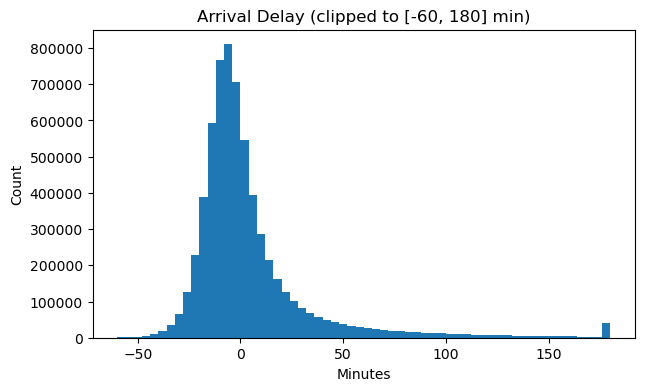

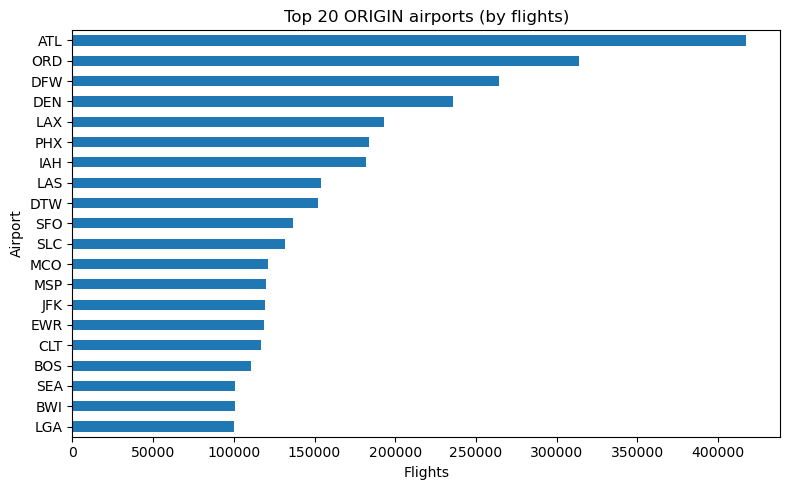

In [26]:
# Examples: carrier, origin, dest
if "OP_CARRIER" in df.columns:
    print("\nDelay/Cancel rates by OP_CARRIER (min 100 rows):")
    display(rate_table(df, "OP_CARRIER"))
if "ORIGIN" in df.columns:
    print("\nDelay/Cancel rates by ORIGIN (min 100 rows):")
    display(rate_table(df, "ORIGIN"))
if "DEST" in df.columns:
    print("\nDelay/Cancel rates by DEST (min 100 rows):")
    display(rate_table(df, "DEST"))


# 9) Simple visuals (matplotlib only)

plt.figure(figsize=(7,4))
if "ARR_DELAY" in df.columns:
    # Clip extreme positives for a readable histogram
    arr_clip = df["ARR_DELAY"].clip(lower=-60, upper=180)
    plt.hist(arr_clip.dropna(), bins=60)
    plt.title("Arrival Delay (clipped to [-60, 180] min)")
    plt.xlabel("Minutes")
    plt.ylabel("Count")
    plt.show()

# Top 20 busiest ORIGINs by count
if "ORIGIN" in df.columns:
    top_origin = df["ORIGIN"].value_counts().head(20)
    plt.figure(figsize=(8,5))
    top_origin.sort_values().plot(kind="barh")
    plt.title("Top 20 ORIGIN airports (by flights)")
    plt.xlabel("Flights")
    plt.ylabel("Airport")
    plt.tight_layout()
    plt.show()





In [27]:
# 10) Save a cleaned/typed output df

# Optional: small, typed, analysis-ready subset
keep_cols = [
    "FL_DATE","OP_CARRIER","OP_CARRIER_FL_NUM","ORIGIN","DEST",
    "CRS_DEP_TIME","DEP_TIME","DEP_DELAY","TAXI_OUT","WHEELS_OFF",
    "WHEELS_ON","TAXI_IN","CRS_ARR_TIME","ARR_TIME","ARR_DELAY",
    "CANCELLED","CANCELLATION_CODE","CANCELLATION_REASON","DIVERTED",
    "CRS_ELAPSED_TIME","ACTUAL_ELAPSED_TIME","AIR_TIME","DISTANCE",
    "CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY",
    "CRS_DEP_DT","DEP_DT","CRS_ARR_DT","ARR_DT","IS_DELAYED_15"
]
keep_cols = [c for c in keep_cols if c in df.columns]
df_clean = df[keep_cols].copy()

# Example export (commented out):
# df_clean.to_parquet("dot_delays_clean.parquet", index=False)
# df_clean.to_csv("dot_delays_clean.csv", index=False)

print("\nPrepared `df_clean` with typed fields and engineered features.")
print(df_clean.head(3))


Prepared `df_clean` with typed fields and engineered features.
     FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0 2009-01-01         XE               1204    DCA  EWR          1100   
1 2009-01-01         XE               1206    EWR  IAD          1510   
2 2009-01-01         XE               1207    EWR  DCA          1100   

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CARRIER_DELAY  \
0    1058.0       -2.0      18.0      1116.0  ...            NaN   
1    1509.0       -1.0      28.0      1537.0  ...            NaN   
2    1059.0       -1.0      20.0      1119.0  ...            NaN   

   WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  \
0            NaN        NaN             NaN                  NaN   
1            NaN        NaN             NaN                  NaN   
2            NaN        NaN             NaN                  NaN   

           CRS_DEP_DT              DEP_DT          CRS_ARR_DT  \
0 2009-01-01 11:00:00 2009-01-01 10: